In [20]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
_df = pd.read_csv("./datasets/breast-cancer-wisconsin.csv")
_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [22]:
y = _df.diagnosis
y = pd.Series([int(x == "B") for x in y])
x = _df.drop(["Unnamed: 32", "id", "diagnosis"], axis=1)
x.head(), y

(   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 0        17.99         10.38          122.80     1001.0          0.11840   
 1        20.57         17.77          132.90     1326.0          0.08474   
 2        19.69         21.25          130.00     1203.0          0.10960   
 3        11.42         20.38           77.58      386.1          0.14250   
 4        20.29         14.34          135.10     1297.0          0.10030   
 
    compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
 0           0.27760          0.3001              0.14710         0.2419   
 1           0.07864          0.0869              0.07017         0.1812   
 2           0.15990          0.1974              0.12790         0.2069   
 3           0.28390          0.2414              0.10520         0.2597   
 4           0.13280          0.1980              0.10430         0.1809   
 
    fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst 

In [23]:
def plot_history_performance(history):
    plt.figure(figsize=(13,10))
    plt.plot(history.history['accuracy'], color='#FFCC00', animated=True, label="Training Acc")
    plt.plot(history.history['val_accuracy'], color='green', animated=True, label="Validation Acc")
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()

In [24]:
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=.5, random_state=0)
x.shape, X_train.shape, X_valid.shape, X_test.shape

((569, 30), (341, 30), (114, 30), (114, 30))

In [25]:
scaler = StandardScaler()
X_norm_train, X_norm_val, X_norm_test = scaler.fit_transform(X_train), scaler.transform(X_valid), scaler.transform(X_test)

In [26]:
# HYPER-PARAMS
EPOCH_LENGTH=30
BATCH_SIZE=14

LEARN_RATE=.001

DROPOUT_RATE=.2

In [27]:
model = keras.Sequential([
    keras.Input(shape=(30,)),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dropout(DROPOUT_RATE),
    keras.layers.Dense(2, activation="sigmoid")
])
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARN_RATE),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

Epoch 1/30
25/25 [==============================] - 2s 35ms/step - loss: 0.7525 - accuracy: 0.5953 - val_loss: 0.3836 - val_accuracy: 0.8246
Epoch 2/30
25/25 [==============================] - 0s 8ms/step - loss: 0.3970 - accuracy: 0.8123 - val_loss: 0.2567 - val_accuracy: 0.9211
Epoch 3/30
25/25 [==============================] - 0s 10ms/step - loss: 0.2764 - accuracy: 0.9296 - val_loss: 0.2071 - val_accuracy: 0.9298
Epoch 4/30
25/25 [==============================] - 0s 10ms/step - loss: 0.2138 - accuracy: 0.9384 - val_loss: 0.1759 - val_accuracy: 0.9298
Epoch 5/30
25/25 [==============================] - 0s 10ms/step - loss: 0.1718 - accuracy: 0.9355 - val_loss: 0.1533 - val_accuracy: 0.9298
Epoch 6/30
25/25 [==============================] - 0s 8ms/step - loss: 0.1603 - accuracy: 0.9501 - val_loss: 0.1399 - val_accuracy: 0.9386
Epoch 7/30
25/25 [==============================] - 0s 8ms/step - loss: 0.1537 - accuracy: 0.9501 - val_loss: 0.1270 - val_accuracy: 0.9386
Epoch 8/30
25/25

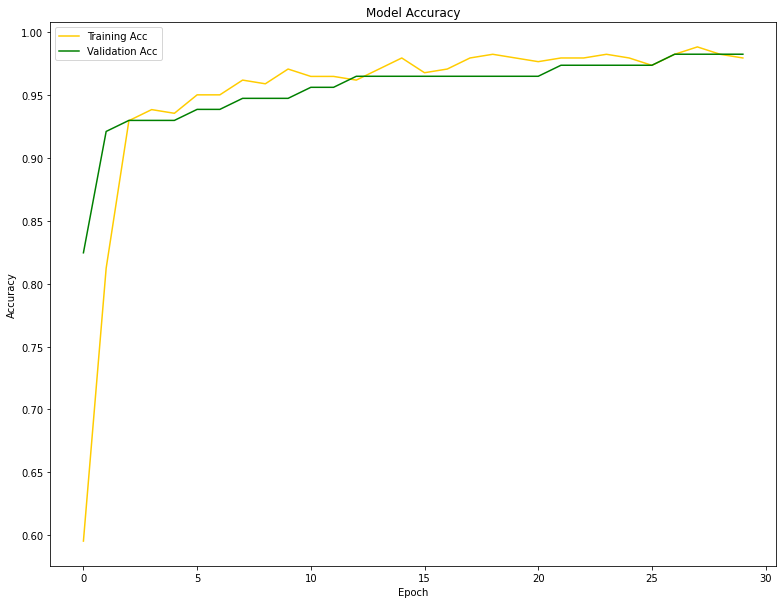

4/4 [==============================] - 0s 5ms/step - loss: 0.0798 - accuracy: 0.9649


[0.07976338267326355, 0.9649122953414917]

In [28]:
history = None
history = model.fit(
    X_norm_train, y_train,
    epochs=EPOCH_LENGTH,
    batch_size=BATCH_SIZE,
    validation_data=(X_norm_val, y_valid)
)

plot_history_performance(history=history)

model.evaluate(X_norm_test, y_test)